# Statistical Process Controls
>Thank you to [Ann Jackson](https://www.linkedin.com/in/annujackson/) for the concept breakdown. Check out her blog post [here](http://jacksontwo.com/statistical-process-control-charts).

According to [Wikipedia](https://en.wikipedia.org/wiki/Statistical_process_control), Statistical process control (SPC) or Statistical Quality Control (SQC) is a method of quality control, born out of the manufacturing industry, which uses statistical methods (*such as the average, mean, and standard deviation*) to monitor and control the quality of a process. This helps to ensure the process operates efficiently, producing more specification-conforming end products or results with less waste. SPC can be applied to any process where the *conforming product* (product meeting specifications) output can be measured. 
<br>
<br>
Key tools include:
- run charts,
- control charts,
- a focus on continuous improvement, and
- the design of expirements 

⚠️ An advantage of SPC over other methods of quality control, such as inspection, is that it emphasizes the early detection and prevention of problems, rather than the correction of problems after they have occurred. In addition to reducing waste, SPC can lead to a reduction production time because it makes it less likely that the end product will need to be reworked or scrapped.

## Application to Non-manufacturing Processes
Statistical process control can also support any repetitive process and has been implemented in many use cases such as:
- financial auditing and accounting,
- IT operations,
- health care processes, and
- clerical processes, such as:
    - loan arrangement and administration and
    - customer billing
    - 

## Using Control Charts to Better Understand Data
### Step I: Data Collection and Cleanup
1. Read in file
2. Check for duplicates
3. Dropping uneccessary columns
4. Column label cleanup
5. Fixing data types and checking for nulls
6. Univariate Distribution Exploration
7. Write clean data to new csv

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# 1. reading in csv file as df
data = 'data_calorie-intake.csv'

df = pd.read_csv(data)
df

,Date,Test Tool Tip,Calories,Total Daily Calories
0,2/29/2016,Warning! 4 out of 5 consecutive observations a...,1614.91,1614.91
1,3/1/2016,Warning! 4 out of 5 consecutive observations a...,1626.08,1626.08
2,3/2/2016,Warning! 4 out of 5 consecutive observations a...,1599.23,1599.23
3,3/3/2016,Warning! 4 out of 5 consecutive observations a...,1640.72,1640.72
4,3/4/2016,Warning! 4 out of 5 consecutive observations a...,1642.72,1642.72
...,...,...,...,...
278,12/3/2016,Warning! 4 out of 5 consecutive observations a...,1651.02,1651.02
279,12/4/2016,Warning! 4 out of 5 consecutive observations a...,1919.79,1919.79
280,12/5/2016,Warning! 4 out of 5 consecutive observations a...,1653.56,1653.56
281,12/6/2016,Warning! 4 out of 5 consecutive observations a...,1653.05,1653.05


In [5]:
# 2. checking for duplicates
df[df.duplicated(keep = False)]

    # no duplicate records; don't need to drop any dupes

,Date,Test Tool Tip,Calories,Total Daily Calories


In [6]:
# 3a. are the last two columns showing the same info?
df[df.Calories != df['Total Daily Calories']]

    # yes; can drop Total Daily Calories column

,Date,Test Tool Tip,Calories,Total Daily Calories


In [7]:
# 3b. is Test column all the same info?
df['Test Tool Tip'].value_counts(dropna = False)

    # yes, can also drop this column

Warning! 4 out of 5 consecutive observations are 1 standard deviation away from the mean on the same side.    283
Name: Test Tool Tip, dtype: int64

In [13]:
# 3c. dropping columns not needed
df2 = df.iloc[:, [0, 2]]

Index(['date', 'calories'], dtype='object')

In [14]:
# 4. lowercasing column names
df2.columns = df2.columns.str.lower()
df2

,date,calories
0,2/29/2016,1614.91
1,3/1/2016,1626.08
2,3/2/2016,1599.23
3,3/3/2016,1640.72
4,3/4/2016,1642.72
...,...,...
278,12/3/2016,1651.02
279,12/4/2016,1919.79
280,12/5/2016,1653.56
281,12/6/2016,1653.05


In [16]:
# 5a. checking data types and nulls
df2.info()

    # date needs to be changed to date data format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283 entries, 0 to 282
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      283 non-null    object 
 1   calories  283 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.5+ KB


In [18]:
# 5b. fixing date
df2.date = pd.to_datetime(df2.date)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283 entries, 0 to 282
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      283 non-null    datetime64[ns]
 1   calories  283 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.5 KB


/usr/local/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


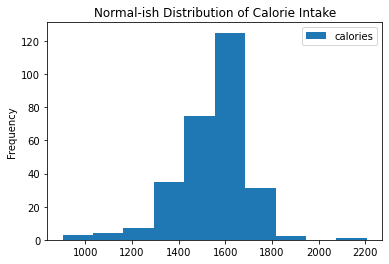

In [45]:
# 6a. looking at calorie distribution
df2.set_index('date').plot.hist()
plt.title('Normal-ish Distribution of Calorie Intake')
plt.savefig('distribution_calories.png')
plt.show()

In [37]:
# 6b. creating date series to view date distribution
series_dates = df2.date
series_dates

0     2016-02-29
1     2016-03-01
2     2016-03-02
3     2016-03-03
4     2016-03-04
         ...    
278   2016-12-03
279   2016-12-04
280   2016-12-05
281   2016-12-06
282   2016-12-07
Name: date, Length: 283, dtype: datetime64[ns]

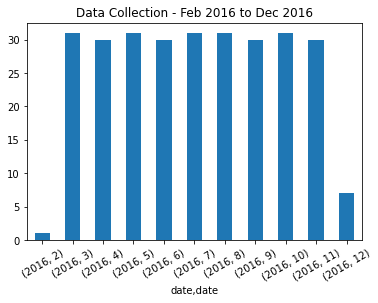

In [46]:
# looking at distribution of dates
series_dates.groupby([series_dates.dt.year, series_dates.dt.month]).count().plot(kind="bar")
plt.xticks(rotation=30)
plt.title('Data Collection - Feb 2016 to Dec 2016')
plt.savefig('distribution_dates.png')
plt.show()

In [47]:
# 7. writing cleaned up data to csv file
df2.to_csv('data_calories-cleaned.csv')

In [20]:
# data that will be used in Tableau
df2

,date,calories
0,2016-02-29,1614.91
1,2016-03-01,1626.08
2,2016-03-02,1599.23
3,2016-03-03,1640.72
4,2016-03-04,1642.72
...,...,...
278,2016-12-03,1651.02
279,2016-12-04,1919.79
280,2016-12-05,1653.56
281,2016-12-06,1653.05


## Western Electric Rules
>Detecting the presence of assignable causes

According to [Wikipedia](https://en.wikipedia.org/wiki/Western_Electric_rules), Western Electric rules are decision rules in statistical process control for detecting out-of-control or non-random conditions in control charts. Observations falling outside of chart control limits (*typically +/- 3 std devs*) of centerline indicate where a process in question should be investigated for assignable causes. These rules were codified by the electrical engineering and manufacturing company, Western Electric and their purpose was to ensure that line workers and engineers interpreted control charts in a uniform way. 
<br>

Zone | σ  | Flagged Data Point
:-- | :-- | :--
Zone A | 3σ | Any data point that falls outside of 3σ from center line
Zone B | 2σ | Any point where ***2 out of the 3 preceding points*** falls outside of 2σ from center line, on the same side
Zone C | 1σ | Any point where ***4 out of the 5 preceding points*** falls outside of 1σ from center line, on the same side